In [ ]:
# import zipfile
# import os

# zip_path = 'zipp.zip'  # Change this to your zip file name
# extract_to = '/content/encryption_decryption'  # Change this if you want a different folder name

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to)

# print("Extraction complete.")


In [ ]:
# COMMAND To delete folder. (use carefully)
#os.system("rm -rf /content/encryption_decryption")
#os.system("rm -rf /content/quantum_images")

In [ ]:
# to make zip of a folder
# !zip -r enc_dec.zip encryption_decryption/

In [ ]:
!pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11418 sha256=8a4ce8d1c992e696f8afdf5dadd90e6e65b00987dce040744eac7b2d58034c75
  Stored in directory: /root/.cache/pip/wheels/87/f9/d9/6ec7e7b470df5ba0e317c6988ba7677a124ab220f5effea702
Successfully built sewar


In [ ]:
import sys
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
from matplotlib import pyplot as plt
import os
import numpy as np
import random
import pandas as pd
from skimage import io
import time
import hashlib
from scipy.integrate import odeint
import re

In [ ]:
# !wget https://i.ibb.co/GxhRPnC/lake-512.jpg -O lake.jpg
# !wget https://i.ibb.co/D18bYP1/peppers-color.jpg -O peppers.jpg
# !wget https://i.ibb.co/2dckpJ9/mandril-color.jpg -O mandril.jpg

In [ ]:
# Specify the folder name
folder_path = "images"

# Get the list of files in the 'images' folder
files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Print the list of files
print(files)

['img1.png']


In [ ]:
######################## CREATING SUPERPOSITION STATES ###################################################################

def convert (H,i_state):
    cov = np.dot(H,i_state)
    si = cov
    alpha=si[0][0]
    beta=si[1][0]
    return [alpha,beta]

In [ ]:
def conv_img(img):
    small = img
    H = np.array([[1,0],[0,1]])
    converted = np.zeros((256,512)) #256,512
    img = small
    list_st=[]
    for i in range(0,len(img)) :
      for j in range(0,len(img[0])):
        a = img[i][j]
        a1= np.sqrt(a/255)
        b= 255 - a
        a2 = np.sqrt(b/255)
        i_state= np.array([[a2],[a1]])
        c = convert(H,i_state)
        list_st+=[c[0]**2 + c[1]**2]
        converted [i][2*j] = c[0]*255
        converted [i][2*j+1] = c[1]*255

    return converted

def conv_rgb(img):
    b, g, r    = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b1, g1, r1 = conv_img(b), conv_img(g), conv_img(r)
    img = cv2.resize(img,(512,256)) #512,256
    img[:,:,0], img[:,:,1], img[:,:,2] = b1, g1, r1
    return img

In [ ]:
# Ensure the 'quantum_images' folder exists
output_folder = "quantum_images"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

img1.png


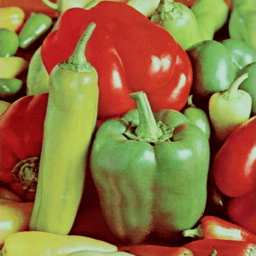

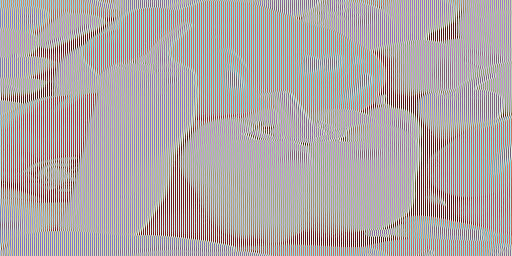

In [ ]:
df = pd.DataFrame()
for filey in files:
  file_path = os.path.join(folder_path, filey)
  img = cv2.imread(file_path)
  print(filey)
  new1 = cv2.resize(img,(256,256)) #256,256
  cv2_imshow(new1)
  conv2=conv_rgb(new1)
  cv2_imshow(conv2)
  # Save the conv2 image to the 'quantum_images' folder
  output_file_path = os.path.join(output_folder, f"quantum_{filey}")
  cv2.imwrite(output_file_path, conv2)

In [ ]:
#################### ENCRYPTION-DECRYPTION OPERATION ###################################

In [ ]:
# Generation of Chaotic image using Chaotic neural Network (CaNN)

class ChaoticNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, alpha=0.5, a=0.1, b=0.2, c=0.7, I=0.5, hash_key1=None,
                 hash_key2=None, hash_key3=None, hash_key4=None):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.alpha = alpha
        self.a = a
        self.b = b
        self.c = c  # Increased c for stronger chaos
        self.I = I
        self.hash_key1 = hash_key1
        self.hash_key2 = hash_key2
        self.hash_key3 = hash_key3
        self.hash_key4 = hash_key4

        # Initialize the weights and biases
        np.random.seed(int(hashlib.sha256(hash_key1).hexdigest(),16) % 10 ** 8)
        self.weights1 = np.random.uniform(-1, 1, size=(hidden_size, input_size))
        np.random.seed(int(hashlib.sha256(hash_key2).hexdigest(),16) % 10 ** 8)
        self.bias1 = np.random.uniform(-1, 1, size=(hidden_size,))
        np.random.seed(int(hashlib.sha256(hash_key3).hexdigest(),16) % 10 ** 8)
        self.weights2 = np.random.uniform(-1, 1, size=(output_size, hidden_size))
        np.random.seed(int(hashlib.sha256(hash_key4).hexdigest(),16) % 10 ** 8)
        self.bias2 = np.random.uniform(-1, 1, size=(output_size,))

    def ikeda_map(self, x, y, iterations=12):
        """Enhanced Ikeda map with more iterations for stronger chaos"""
        u, v = x, y
        for _ in range(iterations):
            t = 1.0 + self.c * (u * np.cos(v) - v * np.sin(u))
            v = self.c * (u * np.sin(v) + v * np.cos(u))
            u = t
        return u, v

    def predict(self, input, feedback=None):
        """Predict with optional feedback for increased scrambling"""
        # Calculate the output of the first layer with enhanced chaos
        hidden = np.zeros((self.hidden_size,))
        for i in range(self.hidden_size):
            chaotic_input = np.dot(self.weights1[i], input) + self.bias1[i]
            if feedback is not None:
                chaotic_input += 0.1 * feedback[i % self.output_size]  # Add feedback for more chaos
            hidden[i] = self.ikeda_map(chaotic_input, chaotic_input / 2)[0]

        # Calculate the output of the second layer
        output = np.dot(self.weights2, hidden) + self.bias2
        return output, hidden

    def train(self, input, target):
        # Calculate the output of the first layer
        hidden = np.zeros((self.hidden_size,))
        for i in range(self.hidden_size):
            chaotic_input = np.dot(self.weights1[i], input) + self.bias1[i]
            hidden[i] = self.ikeda_map(chaotic_input, chaotic_input / 2)[0]

        # Calculate the output of the second layer
        output = np.dot(self.weights2, hidden) + self.bias2

        # Calculate the error and update the weights and biases of the second layer
        error = target - output
        delta2 = self.alpha * np.outer(error, hidden)
        self.weights2 += delta2
        self.bias2 += self.alpha * error

        # Calculate the error and update the weights and biases of the first layer
        error = np.dot(self.weights2.T, error)
        delta1 = np.zeros((self.hidden_size, self.input_size))
        for i in range(self.hidden_size):
            x = np.dot(self.weights1[i], input) + self.bias1[i]
            y = self.ikeda_map(x, x / 2)[1]
            du_dx = self.c * np.cos(y) - self.c * x * np.sin(y)
            error_i = error[i] * du_dx
            delta1[i] = self.alpha * error_i * input
            self.bias1[i] += self.alpha * error_i

        self.weights1 += delta1
        return error

Mean of the image (C):  171.15256373087564

QCaNN image saved: encryption_decryption/cann_images/qcnn_quantum_img4.png (Execution time: 1366.36 seconds)


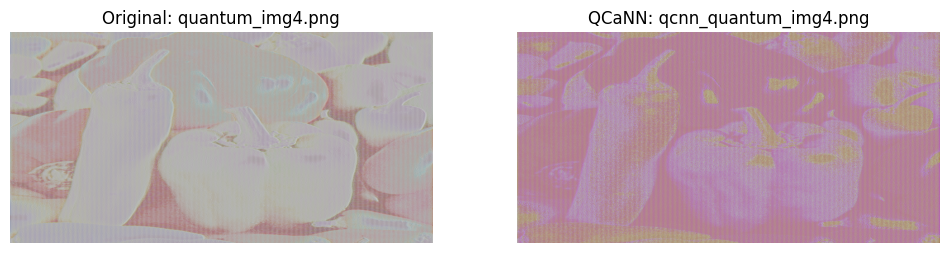

In [ ]:

def normalize_quantum_pair(alpha, beta):
    """Normalize two values to satisfy α² + β² = 1 while preserving diversity"""
    norm = np.sqrt(alpha**2 + beta**2)
    if norm == 0:  # Avoid division by zero
        return 0.707, 0.707  # Default to equal superposition
    alpha_n = (alpha / norm) * np.abs(alpha)
    beta_n = (beta / norm) * np.abs(beta)
    scale = 1 / np.sqrt(alpha_n**2 + beta_n**2)
    return alpha_n * scale, beta_n * scale

def generate_qcann_images(input_folder, output_folder):
    """Applies the Quantum-Inspired Chaotic Neural Network to generate highly scrambled images."""
    for file_name in os.listdir(input_folder):
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            input_file_path = os.path.join(input_folder, file_name)

            # Start time
            start_time = time.perf_counter()

            # Load the image
            image = Image.open(input_file_path)
            width, height = image.size

            # Compute average intensity and convert to bytes
            C = np.mean(np.array(image))
            print("Mean of the image (C): ", C)
            image_bytes = image.tobytes()

            # Generate hash using SHA-256
            hash_digest = hashlib.sha256(image_bytes).digest()

            # Split hash into 4 parts for quantum-inspired keys
            part_size = len(hash_digest) // 4
            hash_key1 = hash_digest[:part_size]
            hash_key2 = hash_digest[part_size:2*part_size]
            hash_key3 = hash_digest[2*part_size:3*part_size]
            hash_key4 = hash_digest[3*part_size:]

            # Create a Quantum Chaotic Neural Network with all four hash keys
            qcann = ChaoticNeuralNetwork(
                input_size=3,
                hidden_size=30,
                output_size=3,
                hash_key1=hash_key1,
                hash_key2=hash_key2,
                hash_key3=hash_key3,
                hash_key4=hash_key4
            )

            # Use original image data with chaotic perturbation
            data = np.array(image) / 255.0  # Normalize to [0, 1]
            perturbation = np.random.uniform(-0.1, 0.1, data.shape)  # Add small chaotic noise
            data = np.clip(data + perturbation, 0, 1)

            # Apply QCaNN transformation with quantum constraint and feedback
            reconstructed_data = np.zeros_like(data, dtype=np.float64)
            previous_output = None
            for i in range(data.shape[0]):  # rows
                for j in range(0, data.shape[1], 2):  # columns, step by 2
                    # Process first pixel in pair with feedback
                    input_pixel1 = data[i, j, :]
                    output_pixel1, hidden1 = qcann.predict(input_pixel1, feedback=previous_output)

                    # Handle the case where we have an odd number of columns
                    if j + 1 < data.shape[1]:
                        # Process second pixel in pair with feedback
                        input_pixel2 = data[i, j + 1, :]
                        output_pixel2, hidden2 = qcann.predict(input_pixel2, feedback=output_pixel1)

                        # Apply quantum normalization to each RGB channel
                        for k in range(3):  # RGB channels
                            alpha, beta = normalize_quantum_pair(output_pixel1[k], output_pixel2[k])
                            output_pixel1[k] = alpha
                            output_pixel2[k] = beta

                        reconstructed_data[i, j + 1, :] = output_pixel2
                        previous_output = output_pixel2  # Update feedback
                    else:
                        previous_output = output_pixel1

                    reconstructed_data[i, j, :] = output_pixel1

            # Normalize to [0, 1] range while preserving variation
            reconstructed_data = np.abs(reconstructed_data)  # Remove negative values
            reconstructed_data = (reconstructed_data - np.min(reconstructed_data)) / \
                               (np.max(reconstructed_data) - np.min(reconstructed_data) + 1e-10)
            reconstructed_data = np.clip(reconstructed_data * 255, 0, 255).astype(np.uint8)
            qcann_image = Image.fromarray(reconstructed_data)

            print()

            # Save the QCaNN image
            qcann_file_name = f"qcnn_{file_name}"
            qcann_file_path = os.path.join(output_folder, qcann_file_name)
            qcann_image.save(qcann_file_path)

            # End time and log
            end_time = time.perf_counter()
            print(f"QCaNN image saved: {qcann_file_path} (Execution time: {end_time - start_time:.2f} seconds)")

            # Display original and QCaNN images side by side
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            axes[0].imshow(image)
            axes[0].set_title(f"Original: {file_name}")
            axes[0].axis("off")
            axes[1].imshow(qcann_image)
            axes[1].set_title(f"QCaNN: {qcann_file_name}")
            axes[1].axis("off")
            plt.show()

# Input and output folders
input_folder = "quantum_images"  # Folder containing quantum images
output_folder = os.path.join("encryption_decryption", "cann_images")  # Folder for QCaNN images

# Ensure the output folder exists
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Generate and save QCaNN images
generate_qcann_images(input_folder, output_folder)

In [ ]:
# Generation of Diffused image and rotated image

# Function to create folders if they don't exist
def ensure_folder_exists(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"Folder created: {folder_path}")
    else:
        print(f"Folder already exists: {folder_path}")

# Function to generate diffused image (XOR operation)
def generate_diffused_image(cann_image, original_image):
    arr1 = np.array(cann_image)
    arr2 = np.array(original_image)

    # Performing XOR operation between the two color images
    result_arr = np.bitwise_xor(arr1, arr2)

    # Convert the result numpy array back to a PIL image
    result_img = Image.fromarray(result_arr)

    return result_img

###################################### HADAMARD GATE CODE ##################################

def hadamard_transform(image, theta):
    """Applies Hadamard-like transformation to an image."""
    # Convert theta to radians
    theta = np.radians(theta)

    # Convert the PIL Image to a NumPy array
    image = np.array(image)

    # Construct the transformation matrix
    # H = np.array([[np.cos(theta), np.sin(theta)],
    #               [np.sin(theta), -np.cos(theta)]], dtype=np.float32)

    # pauli-x gate
    P = np.array([[0, 1],
                  [1, 0]], dtype=np.float32)

    transformed_image = image.copy().astype(np.float32)

    # Process each row
    for i in range(image.shape[0]):
        for j in range(0, image.shape[1], 2):  # Ensure even column count
            for k in range(3):  # Process R, G, B separately
                if j + 1 < image.shape[1]:
                    alpha, beta = transformed_image[i, j, k], transformed_image[i, j+1, k]
                    transformed_pixel = np.dot(P, np.array([alpha, beta]))
                    transformed_image[i, j, k], transformed_image[i, j+1, k] = transformed_pixel

    return transformed_image


# Function to generate diffused and rotated images for each CaNN image
def process_cann_images(input_folder, diffused_folder, rotated_folder, original_folder):
    # Ensure output folders exist
    ensure_folder_exists(diffused_folder)
    ensure_folder_exists(rotated_folder)

    for file_name in os.listdir(input_folder):
        if file_name.endswith(('.png', '.jpg', '.jpeg')):
            # Input file paths
            cann_file_path = os.path.join(input_folder, file_name)
            original_file_name = file_name.replace("qcnn_", "")  # Assuming original file name without CaNN_ prefix
            original_file_path = os.path.join(original_folder, original_file_name)

            # Load images
            cann_image = Image.open(cann_file_path)
            original_image = Image.open(original_file_path)

            # Generate diffused image
            diffused_image = generate_diffused_image(cann_image, original_image)

            # Save diffused image
            diffused_file_name = f"diffused_{original_file_name}"
            diffused_file_path = os.path.join(diffused_folder, diffused_file_name)
            diffused_image.save(diffused_file_path)

            # Generate rotated image
            # rotated_image = rotate_image_blocks(diffused_image)
            rotated_image = hadamard_transform(diffused_image, 90)

            print(rotated_image[:5, :5, 0])  # For the Red channel
            print(rotated_image[:5, :5, 1])  # For the Green channel
            print(rotated_image[:5, :5, 2])  # For the Blue channel

            # Convert the NumPy array back to a PIL Image before saving
            rotated_image = Image.fromarray(rotated_image.astype(np.uint8))

            # Save rotated image
            rotated_file_name = f"rotated_{original_file_name}"
            rotated_file_path = os.path.join(rotated_folder, rotated_file_name)
            rotated_image.save(rotated_file_path)

            print(f"Processed: {file_name} -> Diffused and Rotated images saved")

# Input folders
cann_input_folder = os.path.join("encryption_decryption", "cann_images")  # Folder containing CaNN images
original_input_folder = "quantum_images"  # Folder containing quantum images

# Output folders
diffused_output_folder = os.path.join("encryption_decryption", "diffused_images")  # Folder for diffused images
rotated_output_folder = os.path.join("encryption_decryption", "rotated_images")  # Folder for rotated images

# Process CaNN images to generate diffused and rotated images
process_cann_images(cann_input_folder, diffused_output_folder, rotated_output_folder, original_input_folder)


Folder created: encryption_decryption/diffused_images
Folder created: encryption_decryption/rotated_images
[[104.  35. 104.  84. 113.]
 [101.  63.  96.  42. 104.]
 [116.  61. 127.  53. 125.]
 [123.  48. 127.  40. 127.]
 [ 97.  63. 102.  35. 100.]]
[[150.  54. 138.  52. 158.]
 [173.  59. 148.  53. 155.]
 [174.  58. 145.  53. 151.]
 [148.  55. 154.  48. 146.]
 [144.  50. 141.  44. 136.]]
[[136. 148. 152. 190. 153.]
 [110. 135. 153. 188. 150.]
 [108. 190. 133. 173. 158.]
 [145. 186. 159. 178. 154.]
 [134. 183. 152. 183. 171.]]
Processed: qcnn_quantum_img4.png -> Diffused and Rotated images saved


In [ ]:
# Lorenz system and shuffle image logic

####################### LORENZ SHUFFLING CODE ############################
# Lorenz system differential equations

def lorenz_system(x, y, z, sigma=10, beta=8/3, rho=28, dt=0.01, steps=10000):
    """
    Generates a chaotic sequence using the Lorenz system.

    Returns:
        indices: A list of shuffled indices.
    """
    trajectory = []
    for _ in range(steps):
        dx = sigma * (y - x) * dt
        dy = (x * (rho - z) - y) * dt
        dz = (x * y - beta * z) * dt
        x += dx
        y += dy
        z += dz
        trajectory.append((x, y, z))

    # Normalize and convert trajectory into index positions
    trajectory = np.array(trajectory)
    norm_x = np.argsort(trajectory[:, 0])  # Sorting based on X generates shuffled indices
    return norm_x

# Function to shuffle pixels using lorenz system
def shuffle_image(image):
    """
    Shuffles the pixels of an image using the Lorenz system.

    Returns:
        Shuffled image and the Lorenz indices for unshuffling.
    """
    h, w, c = image.shape
    pixels = image.reshape(-1, c)  # Flatten image into a pixel list
    indices = lorenz_system(0.1, 0.1, 0.1, steps=len(pixels))  # Generate chaotic indices
    print("indices = ", indices)

    shuffled_pixels = pixels[indices]  # Apply shuffle
    shuffled_image = shuffled_pixels.reshape(h, w, c)  # Reshape back to image format

    return shuffled_image, indices


In [ ]:
# Generation of shuffled image using Lorenz system

def process_rotated_images(input_folder, output_folder):

    # Define the number of iterations and the initial conditions
    num_iter = 300000
    x = np.zeros(num_iter)
    y = np.zeros(num_iter)
    x[0] = 1.0
    y[0] = 1.0

    # Iterate the Ikeda map and store the results
    # for i in range(num_iter - 1):
    #     x[i + 1], y[i + 1] = ikeda_map(x[i], y[i])

    # Ensure the output folder exists
    ensure_folder_exists(output_folder)

    # Iterate through the rotated images in the input folder
    for i, file_name in enumerate(os.listdir(input_folder)):
        if file_name.startswith('rotated_') and file_name.endswith(('.png', '.jpg', '.jpeg')):

            # Extract the numeric ID from the filename (e.g., 'rotated_quantum_img1' -> 1)
            img_id = file_name.split('rotated_quantum_img')[-1].split('.')[0]

            # Input rotated image path
            rotated_image_path = os.path.join(input_folder, file_name)

            # Load the rotated image
            img_2 = cv2.imread(rotated_image_path)
            img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

            # Shuffle the image (using a custom shuffle logic)
            shuffled_img, indices = shuffle_image(img_2)

            # Save the shuffled image to the output folder
            shuffled_file_name = f"shuffled_img{img_id}.png"
            shuffled_file_path = os.path.join(output_folder, shuffled_file_name)
            cv2.imwrite(shuffled_file_path, shuffled_img)

            print(f"Shuffled image saved: {shuffled_file_path}")

# Input and output folders
rotated_images_folder = os.path.join("encryption_decryption", "rotated_images")  # Folder containing rotated images
shuffled_images_folder = os.path.join("encryption_decryption", "shuffled_images")  # Folder for shuffled images

# Ensure the shuffled images folder exists
ensure_folder_exists(shuffled_images_folder)

# Process rotated images and save shuffled versions
process_rotated_images(rotated_images_folder, shuffled_images_folder)

Folder created: encryption_decryption/shuffled_images
Folder already exists: encryption_decryption/shuffled_images
indices =  [15230 41650 41649 ...    57    55    56]
Shuffled image saved: encryption_decryption/shuffled_images/shuffled_img4.png


In [ ]:
# Hyperchaotic image generation

# Hyper-chaotic system function
def d5_Eq(p, t):
    a, b = 23, 3
    c, m = 18, 12
    h = 4
    dxdt = a * p[1] - a * p[0]
    dydt = (c - a) * p[0] + c * p[1] + p[4] - p[0] * p[2]
    dzdt = -b * p[2] + p[0] * p[1]
    dudt = m * p[4]
    dvdt = - p[1] - h * p[3]
    dpdt = [dxdt, dydt, dzdt, dudt, dvdt]
    return dpdt

# Function to extract a single column from the 5D chaotic system output
def extract_single_col(pp, i, row, col):
    ll = []
    for item in pp:
        ll.append(item[i])
    ll = np.array(ll)
    ll.resize(row, col)
    return ll

# Function to generate numbers from the key and mean image value
def generate_numbers(key, mean_image):
    # Flatten the mean image into a 1D array
    data = mean_image.flatten().astype(np.float64)

    # Convert the data to a bytes object
    data_bytes = data.tobytes()

    # Generate a salt value based on the input key
    salt = hashlib.sha256(key.encode()).hexdigest()

    # Hash the data with SHA-256 and the salt value
    hash_object = hashlib.sha256(data_bytes + salt.encode())
    hash_bytes = hash_object.digest()

    # Seed the random number generator with the hash value
    random.seed(int.from_bytes(hash_bytes, byteorder='big'))

    # Generate 5 random floats between -0.1 and 0.01 using the seeded random number generator
    random_floats = [random.uniform(-0.1, 0.1) for _ in range(5)]

    # Combine the random floats with the hash value
    combined_values = random_floats + [int.from_bytes(hash_bytes, byteorder='big') / 2 ** 256]

    # Truncate the combined values to 6 decimal places and return them
    return [round(x, 9) for x in combined_values[:5]]

# Function to process the image and generate hyperchaotic output
def process_and_generate_hyperchaotic_image(shuffled_image_path, quantum_image_path, output_folder, image_id):
    # Ensure output folder exists
    ensure_folder_exists(output_folder)

    # Load shuffled image
    shuffled_img = cv2.imread(shuffled_image_path)
    shuffled_img = cv2.cvtColor(shuffled_img, cv2.COLOR_BGR2RGB)

    # Split the shuffled image into channels
    (R, G, B) = cv2.split(shuffled_img)

    # Get image dimensions (row and column)
    row, col, _ = shuffled_img.shape

    # Load the quantum image
    if os.path.isfile(quantum_image_path):  # Check if it's a file
        quantum_img = Image.open(quantum_image_path)
        mean_image = np.mean(np.array(quantum_img))
    else:
        print(f"Warning: Skipping {quantum_image_path} as it is not a file.")
        return  # Skip processing for this image

    # Generate initial conditions for the 5D hyper-chaotic system
    key = "kn$9t3rt5%eml@Z71!@#$5q&*90AsD$x"
    p0 = generate_numbers(key, mean_image)

    # Time span for chaotic system
    t = np.linspace(0, 100, 1000000 + 196608)  # tspan for chaotic system
    p = odeint(d5_Eq, p0, t)  # Solver for 5d_Eq
    pp = np.absolute(p[1000000:, :] * 10000000)
    pp = np.array(pp % 512, dtype=np.uint8) #256 in place of 512

    # Extracting columns for the key generation
    k1 = extract_single_col(pp, 0, row, col)
    k2 = extract_single_col(pp, 1, row, col)
    k3 = extract_single_col(pp, 2, row, col)
    k4 = extract_single_col(pp, 3, row, col)
    k5 = extract_single_col(pp, 4, row, col)

    # Creating new keys
    k123 = k1 ^ k2 ^ k3
    k234 = k2 ^ k3 ^ k4
    k345 = k3 ^ k4 ^ k5

    # Create a 256x256x3 numpy array to represent the image
    hyperchaotic_image = np.zeros((row, col, 3), dtype=np.uint8)

    # Assign the key values to each channel
    hyperchaotic_image[:, :, 0] = k123
    hyperchaotic_image[:, :, 1] = k234
    hyperchaotic_image[:, :, 2] = k345

    # Apply quantum superposition (α² + β² = 1) column-wise for pairs of pixels
    for channel, key in enumerate([k123, k234, k345]):
        for c in range(col):
            column = key[:, c]
            # Process pairs of pixels (assuming even number of rows for simplicity)
            for r in range(0, row - 1, 2):
                # Normalize pixel values to [0, 1] range
                alpha = column[r] / 255.0
                beta = column[r + 1] / 255.0
                # Enforce superposition: α² + β² = 1
                norm = np.sqrt(alpha**2 + beta**2)
                if norm > 0:  # Avoid division by zero
                    alpha_normalized = alpha / norm
                    beta_normalized = beta / norm
                else:
                    alpha_normalized, beta_normalized = 0.0, 1.0  # Default case
                # Scale back to [0, 255] range
                hyperchaotic_image[r, c, channel] = int(alpha_normalized * 255)
                hyperchaotic_image[r + 1, c, channel] = int(beta_normalized * 255)
            # If row is odd, handle the last pixel separately
            if row % 2 != 0:
                hyperchaotic_image[row - 1, c, channel] = key[row - 1, c]

    # Saving the hyperchaotic image
    hyperchaotic_image_path = os.path.join(output_folder, f"hyperchaotic_img{image_id}.png")
    cv2.imwrite(hyperchaotic_image_path, hyperchaotic_image)

    print(f"Hyperchaotic image saved: {hyperchaotic_image_path}")

# Input and output folders
shuffled_images_folder = os.path.join("encryption_decryption", "shuffled_images")  # Folder containing shuffled images
quantum_images_folder = os.path.join("quantum_images")  # Folder containing quantum images
hyperchaotic_images_folder = os.path.join("encryption_decryption", "hyperchaotic_images")  # Folder for hyperchaotic images

# Ensure the hyperchaotic_images folder exists
ensure_folder_exists(hyperchaotic_images_folder)

# Get the number of images in the shuffled_images folder (assuming both folders have equal number of images)
shuffled_images = os.listdir(shuffled_images_folder)
quantum_images = os.listdir(quantum_images_folder)

# Iterate over the images based on the number of images in the shuffled_images folder
for i in range(min(len(shuffled_images), len(quantum_images))):
    # Assuming images are named sequentially (e.g., shuffled_img1.jpg, quantum_img1.jpg, etc.)
    #print(len(shuffled_images), len(quantum_images))
    shuffled_image_name = shuffled_images[i]
    quantum_image_name = quantum_images[i]

    # Full paths for shuffled and quantum images
    shuffled_image_path = os.path.join(shuffled_images_folder, shuffled_image_name)
    quantum_image_path = os.path.join(quantum_images_folder, quantum_image_name)

    # Check if the shuffled image file exists and is readable:
    if not os.path.isfile(shuffled_image_path):
        print(f"Warning: Shuffled image file not found: {shuffled_image_path}, skipping.")
        continue # Skip to the next image

    # Extract the numeric ID from the filename
    img_id = quantum_image_name.split('quantum_img')[-1].split('.')[0]

    # Process the images and save the hyperchaotic output
    process_and_generate_hyperchaotic_image(shuffled_image_path, quantum_image_path, hyperchaotic_images_folder, img_id)


Folder created: encryption_decryption/hyperchaotic_images
Folder already exists: encryption_decryption/hyperchaotic_images
Hyperchaotic image saved: encryption_decryption/hyperchaotic_images/hyperchaotic_img4.png


In [ ]:
#######################################################
# Final encryption of the image
#######################################################

# Input folder paths
shuffled_images_folder = os.path.join("encryption_decryption", "shuffled_images")  # Folder containing shuffled images
hyperchaotic_images_folder = os.path.join("encryption_decryption", "hyperchaotic_images")  # Folder containing hyperchaotic images
final_encryption_folder = os.path.join("encryption_decryption", "final_encryption")  # Folder for saving encrypted images

# Ensure the final_encryption folder exists
ensure_folder_exists(final_encryption_folder)

# Get the list of shuffled and hyperchaotic images
shuffled_images = os.listdir(shuffled_images_folder)
hyperchaotic_images = os.listdir(hyperchaotic_images_folder)

# Start time
start_time = time.perf_counter()

# Iterate over the images based on the number of images in the shuffled_images folder
# Use a separate index (j) to access hyperchaotic_images, incrementing it only when a valid shuffled image is processed.
j = 0
for i in range(len(shuffled_images)):
    # Assuming images are named sequentially (e.g., shuffled_img1.jpg, hyperchaotic_img1.jpg, etc.)
    shuffled_image_name = shuffled_images[i]
    # Skip if it's the .ipynb_checkpoints directory
    if shuffled_image_name == ".ipynb_checkpoints":
        continue
    hyperchaotic_image_name = hyperchaotic_images[j]

    # Full paths for shuffled and hyperchaotic images
    shuffled_image_path = os.path.join(shuffled_images_folder, shuffled_image_name)
    hyperchaotic_image_path = os.path.join(hyperchaotic_images_folder, hyperchaotic_image_name)

    # Load the shuffled image
    img_1 = Image.open(shuffled_image_path)

    # Load the hyperchaotic image
    img_2 = Image.open(hyperchaotic_image_path)

    # Converting the images to numpy arrays
    arr_1 = np.array(img_1)
    arr_2 = np.array(img_2)

    # Performing XOR operation between the two color images
    result_arr2 = np.bitwise_xor(arr_1, arr_2)

    # Converting the result numpy array back to a PIL image
    enc_img = Image.fromarray(result_arr2)

    # Extract the numeric ID from the filename
    img_id = shuffled_image_name.split('shuffled_img')[-1].split('.')[0]

    # Save the encrypted image under the 'final_encryption' folder with the respective file name
    encrypted_img_path = os.path.join(final_encryption_folder, f"encrypted_img{img_id}.png")
    enc_img.save(encrypted_img_path)

    print(f"Encrypted image saved: {encrypted_img_path}")
    j += 1

# End time
end_time = time.perf_counter()

# Total execution time
total_time = end_time - start_time
print("Encryption Execution Time:", total_time)

Folder created: encryption_decryption/final_encryption
Encrypted image saved: encryption_decryption/final_encryption/encrypted_img4.png
Encryption Execution Time: 0.13146231900009298


In [ ]:
############################################################
################# Decryption Algorithm #####################

In [ ]:
# Generation of reverse shuffled images

def get_image_files(folder_path, extension):
    """Get sorted list of image files with specific extension from folder"""
    return sorted([f for f in os.listdir(folder_path) if f.lower().endswith(extension)])

# Start time
start_time = time.perf_counter()

# Define base directory and subfolder paths
base_dir = "encryption_decryption"
encrypted_folder = os.path.join(base_dir, "final_encryption")
hyperchaotic_folder = os.path.join(base_dir, "hyperchaotic_images")
reverse_shuffle_folder = os.path.join(base_dir, "reverse_shuffle")

# Create reverse_shuffle folder if it doesn't exist
ensure_folder_exists(reverse_shuffle_folder)

# Get lists of images from both folders
encrypted_images = get_image_files(encrypted_folder, '.png')
hyperchaotic_images = get_image_files(hyperchaotic_folder, '.png')

# Process each pair of images
for i, (enc_img_name, hyp_img_name) in enumerate(zip(encrypted_images, hyperchaotic_images), 1):
    # Load the encrypted image
    En_img = Image.open(os.path.join(encrypted_folder, enc_img_name))

    # Load the hyperchaotic image
    Hy_img = Image.open(os.path.join(hyperchaotic_folder, hyp_img_name))

    # Convert images to numpy arrays
    arr_1 = np.array(En_img)
    arr_2 = np.array(Hy_img)

    # Perform XOR operation
    result_arr = np.bitwise_xor(arr_1, arr_2)

    # Convert result array back to PIL image
    rt_ikeda_shh = Image.fromarray(result_arr)

    # Extract the numeric ID from the filename (e.g., 'rotated_quantum_img1' -> 1)
    img_id = hyp_img_name.split('hyperchaotic_img')[-1].split('.')[0]

    # Create output filename
    output_filename = f"reverse_shuffle_img{img_id}.png"
    output_path = os.path.join(reverse_shuffle_folder, output_filename)

    # Save the result
    rt_ikeda_shh.save(output_path)

    # Optional: Read with OpenCV if needed for further processing
    imgg = cv2.imread(output_path)

# Calculate and print execution time
end_time = time.perf_counter()
print(f"Processing completed in {end_time - start_time:.2f} seconds")

Folder already exists: encryption_decryption/reverse_shuffle
Processing completed in 0.12 seconds


Processing image with sequence number 4: reverse_shuffle_img4.png
indices =  [15230 41650 41649 ...    57    55    56]


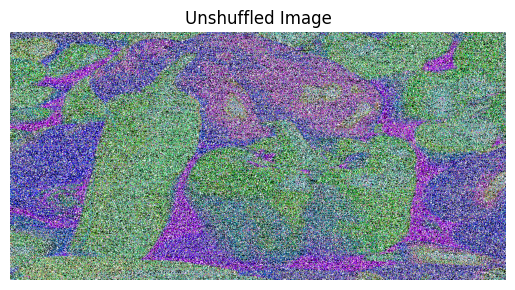

[[  0   0   0   0   0]
 [  0  63  96 255 255]
 [116 255 127   0   0]
 [255  48   0  40 255]
 [248  63 254  35 254]]
[[  0   0   0   0   0]
 [  0  59 148 255 255]
 [174 255 145   0   0]
 [255  55   0  48 255]
 [111  50 213  44 168]]
[[  0   0   0   0   0]
 [  0 135 153 255 255]
 [108 255 133   0   0]
 [255 186   0 178 255]
 [151 183   3 183  16]]


In [ ]:
# Generating decrypted recovered image

########################### LORENZ UNSHUFFLING CODE ##########################
# Function to unshuffle pixels
def unshuffle_image(shuffled_image, indices):
    """
    Unshuffles a Lorenz scrambled image back to its original form.

    Returns:
        The recovered original image.
    """
    h, w, c = shuffled_image.shape
    shuffled_pixels = shuffled_image.reshape(-1, c)

    # Create an empty array to restore original order
    unshuffled_pixels = np.zeros_like(shuffled_pixels)
    unshuffled_pixels[indices] = shuffled_pixels  # Reverse the shuffle

    return unshuffled_pixels.reshape(h, w, c)


###################### INVERSE HADAMARD TRANSFORM (SAME CODE) ####################################
def inverse_hadamard_transform(image, theta):
    """Applies Hadamard-like transformation to an image."""
    # Convert theta to radians
    theta = np.radians(theta)

    # Convert the PIL Image to a NumPy array
    image = np.array(image)
    print(image[:5, :5, 0])  # For the Red channel
    print(image[:5, :5, 1])  # For the Green channel
    print(image[:5, :5, 2])  # For the Blue channel

    # Construct the transformation matrix
    # H = np.array([[np.cos(theta), np.sin(theta)],
    #               [np.sin(theta), -np.cos(theta)]], dtype=np.float32)

    # pauli-x gate
    P = np.array([[0, 1],
                  [1, 0]], dtype=np.float32)

    transformed_image = image.copy().astype(np.float32)

    # Process each row
    for i in range(image.shape[0]):
        for j in range(0, image.shape[1], 2):  # Ensure even column count
            for k in range(3):  # Process R, G, B separately
                if j + 1 < image.shape[1]:
                    alpha, beta = transformed_image[i, j, k], transformed_image[i, j+1, k]
                    transformed_pixel = np.dot(P, np.array([alpha, beta]))
                    transformed_image[i, j, k], transformed_image[i, j+1, k] = transformed_pixel

    return transformed_image


def process_image(input_path, output_path):
    # Read the image
    imgg = cv2.imread(input_path)

    # pixel and indices re-calculation
    h, w, c = imgg.shape
    pixels = imgg.reshape(-1, c)  # Flatten image into a pixel list
    indices = lorenz_system(0.1, 0.1, 0.1, steps=len(pixels))  # Generate chaotic indices
    print("indices = ", indices)
    # Unshuffle the image
    unshuffled_img = unshuffle_image(imgg, indices)
    # Display the unshuffled image
    plt.imshow(unshuffled_img)
    plt.title("Unshuffled Image")
    plt.axis("off")  # Hide axes for a clean view
    plt.show()

    recovered_image = inverse_hadamard_transform(unshuffled_img, theta=45)
    # Convert the NumPy array back to a PIL Image before saving
    recovered_image = Image.fromarray(recovered_image.astype(np.uint8))
    recovered_image.save(output_path)

def get_sequence_number(filename):
    # Extract sequence number from filename using regex
    match = re.search(r'img(\d+)', filename)
    if match:
        return int(match.group(1))
    return 0

input_folder = os.path.join(base_dir, "reverse_shuffle")
output_folder = os.path.join(base_dir, "dec_recovered_img")

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
  os.makedirs(output_folder)

# Get list of input images
input_images = [f for f in os.listdir(input_folder) if f.lower().endswith('.png')]

# Process each image
for img_name in input_images:
  # Get sequence number from input filename
  seq_num = get_sequence_number(img_name)
  if seq_num == 0:
    print(f"Warning: Could not extract sequence number from {img_name}, skipping...")
    continue

  input_path = os.path.join(input_folder, img_name)
  output_path = os.path.join(output_folder, f"dec_rec_img{seq_num}.png")

  print(f"Processing image with sequence number {seq_num}: {img_name}")
  process_image(input_path, output_path)


In [ ]:
#######################################################
# Final decryption of the image
#######################################################

# Input folder paths
cann_images_folder = os.path.join("encryption_decryption", "cann_images")  # Folder containing cann images
dec_images_folder = os.path.join("encryption_decryption", "dec_recovered_img")  # Folder containing diffused images
final_decryption_folder = os.path.join("encryption_decryption", "final_decryption")  # Folder for saving encrypted images

# Ensure the final_encryption folder exists
ensure_folder_exists(final_decryption_folder)

# Get the list of cann and dec_recovered images
cann_images = os.listdir(cann_images_folder)
dec_images = os.listdir(dec_images_folder)

# Start time
start_time = time.perf_counter()

# Iterate over the images based on the number of images in the shuffled_images folder
# Use a separate index (j) to access hyperchaotic_images, incrementing it only when a valid shuffled image is processed.
j = 0
for i in range(len(cann_images)):
    # Assuming images are named sequentially
    cann_image_name = cann_images[i]
    # Skip if it's the .ipynb_checkpoints directory
    if cann_image_name == ".ipynb_checkpoints":
        continue
    dec_image_name = dec_images[j]

    # Full paths for cann and dec_recovered images
    cann_image_path = os.path.join(cann_images_folder, cann_image_name)
    dec_image_path = os.path.join(dec_images_folder, dec_image_name)

    # Load the cann image
    img_1 = Image.open(cann_image_path)

    # Load the dec_recovered image
    img_2 = Image.open(dec_image_path)

    # Converting the images to numpy arrays
    arr_1 = np.array(img_1)
    arr_2 = np.array(img_2)

    # Performing XOR operation between the two color images
    result_arr2 = np.bitwise_xor(arr_1, arr_2)

    # Converting the result numpy array back to a PIL image
    decrypted_img = Image.fromarray(result_arr2)

    # Extract the numeric ID from the filename
    img_id = dec_image_name.split('dec_rec_img')[-1].split('.')[0]

    # Save the decrypted image under the 'final_decryption' folder with the respective file name
    decrypted_img_path = os.path.join(final_decryption_folder, f"decrypted_img{img_id}.png")
    decrypted_img.save(decrypted_img_path)

    print(f"Decrypted image saved: {decrypted_img_path}")
    j += 1

# End time
end_time = time.perf_counter()

# Total execution time
total_time = end_time - start_time
print("Decryption Execution Time:", total_time)

Folder already exists: encryption_decryption/final_decryption
Decrypted image saved: encryption_decryption/final_decryption/decrypted_img4.png
Decryption Execution Time: 0.1660770280000179


In [ ]:
# ########## comparing 2 images

# image_path1 = "/content/encryption_decryption/final_decryption/decrypted_img3.png"
# image_path2 = "/content/quantum_images/quantum_img3.png"

# # Load images
# img1 = cv2.imread(image_path1)
# img2 = cv2.imread(image_path2)

# # Check if images have the same shape
# if img1.shape == img2.shape:
#     # Compute absolute difference
#     difference = cv2.absdiff(img1, img2)
#     if not np.any(difference):
#         print("The images are exactly the same.")
#     else:
#         print("The images are different.")
# else:
#     print("The images have different sizes or channels and are not the same.")

In [ ]:
#################### Measurement Operation #############################################

In [ ]:
def measure_quantum_image(converted_img, measurement_count=1):
    height, width = converted_img.shape
    original_width = width // 2
    measured_results = np.zeros((height, original_width, measurement_count))

    # Seed the random number generator for each measurement to ensure variability
    for m in range(measurement_count):
        np.random.seed(m + 42)  # Different seed for each measurement
        for i in range(height):
            for j in range(original_width):
                # Get the two adjacent pixel values
                alpha = converted_img[i, 2*j] / 255.0
                beta = converted_img[i, 2*j+1] / 255.0

                # Calculate probabilities based on the quantum amplitudes
                # Since encoding calculates alpha = sqrt(1-brightness/255) and beta = sqrt(brightness/255)
                # For retrieval, probability of |0⟩ is alpha^2 and |1⟩ is beta^2
                prob_0 = alpha * alpha
                prob_1 = beta * beta

                # Normalize probabilities if they don't sum to 1 (due to numerical issues)
                total_prob = prob_0 + prob_1
                if total_prob > 0:
                    prob_0 /= total_prob
                    prob_1 /= total_prob
                else:
                    prob_0 = prob_1 = 0.5

                # Random selection based on probability
                if np.random.random() < prob_1:  # Choose |1⟩ state with probability beta^2
                    # |1⟩ state corresponds to the original pixel value
                    value = 255  # Maximum brightness
                else:
                    # |0⟩ state corresponds to the absence of the original pixel value
                    value = 0    # Minimum brightness

                # Store this measurement result
                measured_results[i, j, m] = value

    # Average the measurements
    measured_img = np.mean(measured_results, axis=2)

    # Ensure values are in valid range
    measured_img = np.clip(measured_img, 0, 255)

    return measured_img

def decode_rgb(quantum_img, measurement_count=1):
    """
    Decode an RGB quantum image back to normal image by performing measurements.

    Args:
        quantum_img: The quantum RGB image
        measurement_count: Number of measurements to average

    Returns:
        Decoded RGB image
    """
    # Split into channels
    b, g, r = quantum_img[:, :, 0], quantum_img[:, :, 1], quantum_img[:, :, 2]

    # Measure each channel
    b_measured = measure_quantum_image(b, measurement_count)
    g_measured = measure_quantum_image(g, measurement_count)
    r_measured = measure_quantum_image(r, measurement_count)

    # Combine channels
    height, width = b_measured.shape
    decoded_img = np.zeros((height, width, 3), dtype=np.uint8)
    decoded_img[:, :, 0] = b_measured
    decoded_img[:, :, 1] = g_measured
    decoded_img[:, :, 2] = r_measured

    return decoded_img

In [ ]:
def decode_and_display_quantum_image(quantum_img_path, measurement_counts=[]):
    # Read the quantum image
    quantum_img = cv2.imread(quantum_img_path)

    # Check if image was loaded properly
    if quantum_img is None:
        print(f"Error: Could not load image from {quantum_img_path}")
        return

    # Show the quantum image
    print("Quantum Image:")
    cv2_imshow(quantum_img)

    # Create a figure to display all results
    n_counts = len(measurement_counts)
    plt.figure(figsize=(15, 4))

    # Decode with different measurement counts
    for idx, count in enumerate(measurement_counts):
        # Use a new random seed for each count to ensure different results
        np.random.seed(count * 100)

        decoded_img = decode_rgb(quantum_img, measurement_count=count)

        # Convert BGR to RGB for matplotlib display
        rgb_img = cv2.cvtColor(decoded_img, cv2.COLOR_BGR2RGB)

        # Show the decoded image
        plt.subplot(1, n_counts, idx + 1)
        plt.imshow(rgb_img)
        plt.title(f"{count} measurement(s)")
        plt.axis('off')

        print(f"Decoded with {count} measurement(s):")
        cv2_imshow(decoded_img)
        cv2.imwrite(f'decoded_rgb_{count}_measurements.png', decoded_img)

    plt.suptitle("Comparison of different measurement counts")
    plt.tight_layout()
    plt.savefig('measurement_comparison.png')
    plt.show()

Quantum Image:


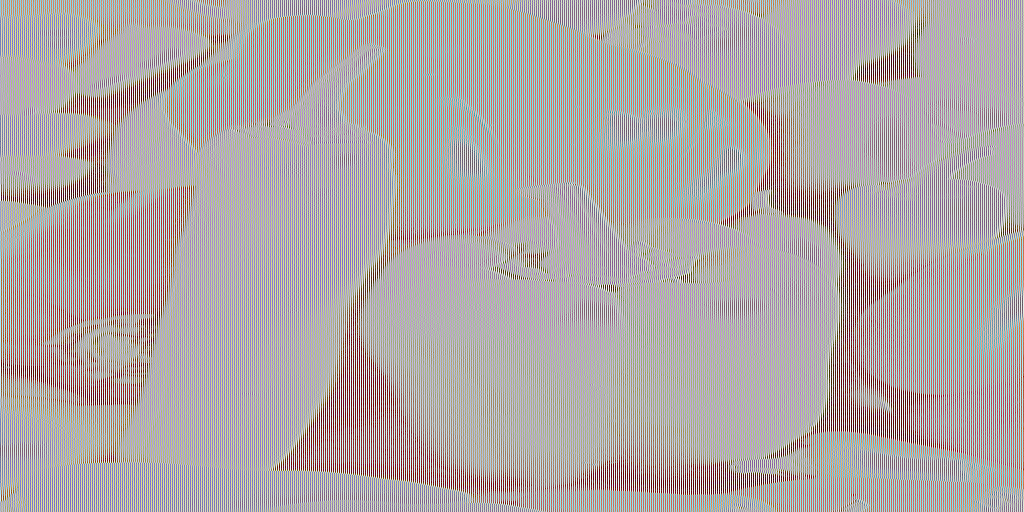

Decoded with 1 measurement(s):


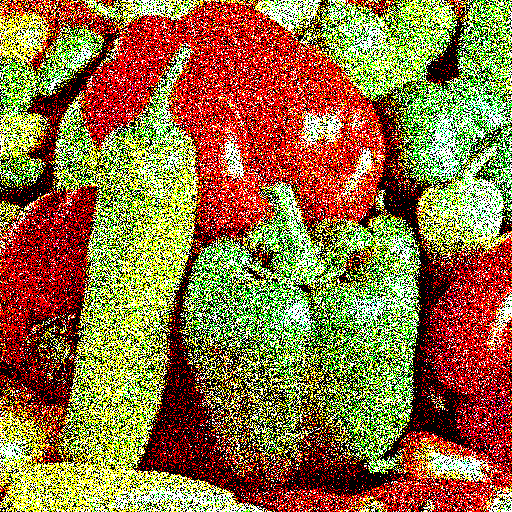

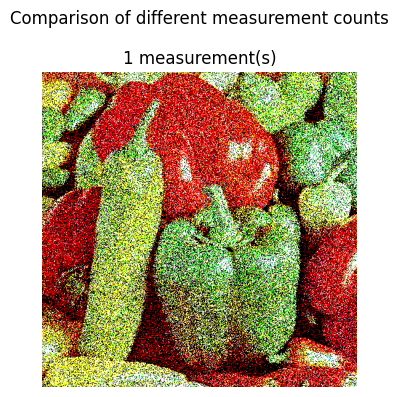

In [ ]:
dir_path = "/content/encryption_decryption/final_decryption"
decrypted_folder = [f for f in os.listdir(dir_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

for file in decrypted_folder:
    img_path = os.path.join(dir_path, file)
    decode_and_display_quantum_image(img_path, measurement_counts=[1])
